In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Set notebook display
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# import data analysis libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set data path
normalized_data_path = os.path.join(os.path.abspath('..'), 'data', 'normalized_data.csv')

if os.path.exists(normalized_data_path):
    print('Input file:', normalized_data_path)
else:
    print('Please fix the path!')

# import raw data; set first column as index name
normalized_data = pd.read_csv(normalized_data_path, index_col = 0)
normalized_data.head()

Input file: /Users/rolf/Downloads/noncomp/rank/data/normalized_data.csv


,EnerCon,RD,Loan,TerInd,PubSpa,WatCon,Engle,Unemp,PopDen,GradeII,SolWas,WasWater,ConWas,PubBus,PasInt
City,,,,,,,,,,,,,,,
Beijing,0.893634,1.000000,0.554920,1.000000,0.466294,0.849516,0.517706,1.000000,0.847562,0.328413,0.804689,0.598266,0.579581,0.159141,0.106449
Tianjin,0.817083,0.498335,0.392968,0.300174,0.160638,0.897654,0.417939,0.214286,0.829570,0.354244,0.982734,1.000000,0.555371,0.099644,0.041950
Shijiazhuang,0.599517,0.561820,0.356321,0.448893,0.278362,0.963315,0.781277,0.175000,0.691098,0.066421,0.922382,0.880058,0.380647,0.080405,0.049464
Qinhuangdao,0.659952,0.558269,0.458958,0.672470,1.000000,0.811938,0.879188,0.260714,0.705688,0.590406,0.445588,0.953179,1.000000,0.051713,0.026325
Baoding,0.651894,0.567148,0.413456,0.000000,0.138770,0.950802,1.000000,0.028571,0.379772,0.000000,0.781403,0.751156,0.455508,0.186165,0.035300


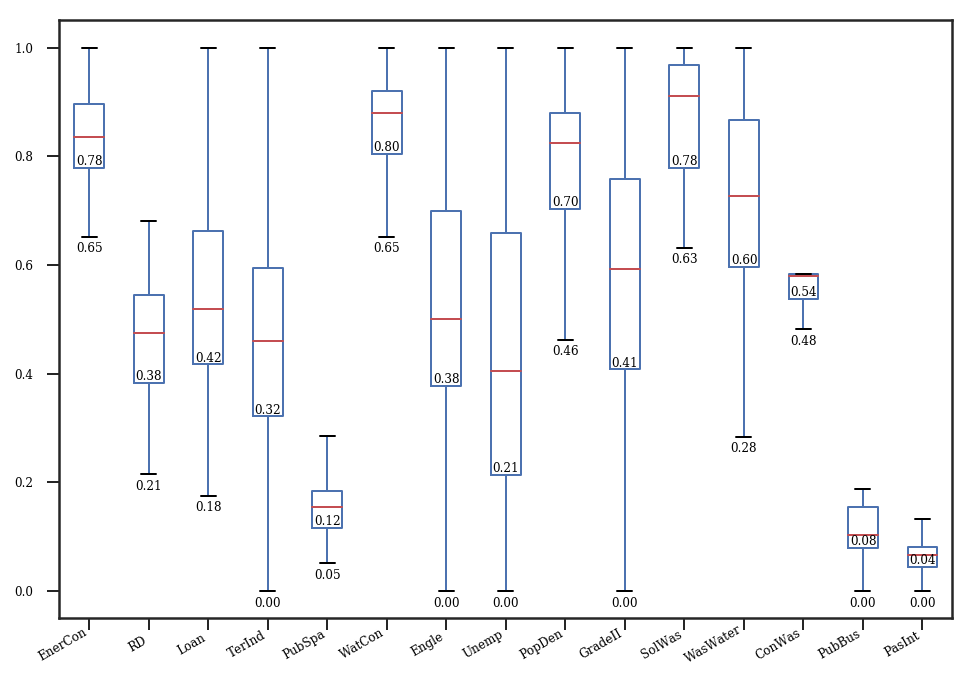

In [5]:
# plot comparative boxplot of indicator for forty cities
fig, ax = plt.subplots()

font = {'family' : 'serif',  
        'color'  : 'k',  
        'weight' : 'normal',  
        'size'   : 6,  
        } 
meanprops = dict(marker = '^', markerfacecolor='none', 
                 markersize=4, linestyle='none', linewidth = 0.5)


sns.set_style('ticks')
_, boxplot = normalized_data.boxplot(ax = ax, grid = False, figsize = (8, 8),
                        showmeans = False, meanprops = meanprops, return_type = 'both')

####
for line in boxplot['boxes']:
    x, y = line.get_xydata()[0]
    plt.text(x+0.03, y, '%.2f' % y, fontdict = font, va = 'bottom')
    

y = [line.get_xydata()[1] for line in boxplot['whiskers']]
    
new_list = []
for n in range(len(y)):
    if n % 2 ==0:
        new_list = new_list + [y[n]]
    
    
for x, y in new_list:
    plt.text(x, y-0.01, '%.2f' % y, fontdict = font, ha = 'center', va = 'top')
######

ax.set_xticklabels(list(normalized_data.columns),rotation = 30, fontdict=font, ha = 'right', va = 'center')

ax.set_yticks(np.linspace(0,1,6))  
ax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontdict = font)

plt.show()

In [130]:
fig.savefig('../results/comparative_boxplot_indicators_with_values.pdf')